In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)
# df = pd.read_csv("lemonade.csv")
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
df.to_csv('lemonade.csv')

In [4]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")

In [5]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18



    68% of observations are within 1 standard deviation of the mean
    95% of observations are within 2 standard deviations of the mean
    99.7% of observations are within 3 standard deviations of the mean


# Exercises
1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

    Using lemonade.csv dataset and focusing on continuous variables:
        Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
        Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
        Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
        Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

    Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

        Use a 2 sigma decision rule to isolate the outliers.
            Do these make sense?
            Should certain outliers be kept or removed?

    Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv


In [6]:
df["month"] = df.index.month_name()

# Check Temp

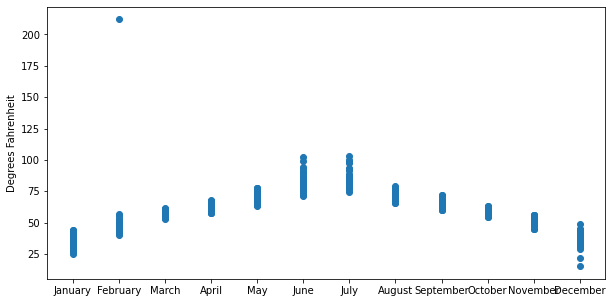

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.Temperature)
plt.ylabel("Degrees Fahrenheit")
plt.show()

In [8]:
df.Temperature.sort_values()

Date
2017-12-31     15.1
2017-12-05     22.0
2017-01-06     25.3
2017-01-01     27.0
2017-01-24     28.6
              ...  
2017-07-18     99.3
2017-07-22     99.6
2017-06-26    102.6
2017-07-01    102.9
2017-02-11    212.0
Name: Temperature, Length: 365, dtype: float64

In [9]:
df.Temperature.idxmax()

Timestamp('2017-02-11 00:00:00')

In [10]:
# I seriously doubt it was 212 outside-that's the boiling point of water. People's blood would literely boil

# I don't want to drop it because time series should be continous. I'll just pick the date before it and sub that in. 

In [11]:
# Let's take a look at the days nearby.
df.loc["2017-02-09":"2017-02-13"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


In [12]:
# Let's assign the temperature for this day to be the same temperature as yesterday
df.loc[df.Temperature == 212, "Temperature"] = df.loc["2017-02-10"].Temperature

# boolean and label based approach,
# if you don't specify Temp, it'll try to replace every value in that row

# Check flyers

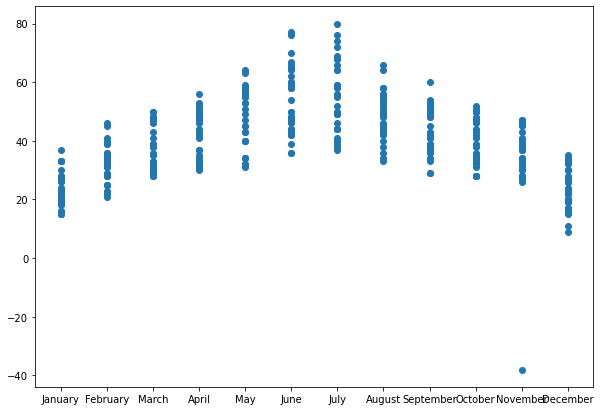

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(df.month, df.Flyers)

In [14]:
# can't hang a negative number of flyers. Likely a typo. Just take abs. 

In [15]:
df.Flyers.sort_values()

Date
2017-11-21   -38
2017-12-31     9
2017-12-05    11
2017-12-10    15
2017-01-28    15
              ..
2017-07-27    74
2017-06-21    76
2017-07-18    76
2017-06-16    77
2017-07-14    80
Name: Flyers, Length: 365, dtype: int64

In [16]:
df.Flyers.idxmin()

Timestamp('2017-11-21 00:00:00')

In [17]:
df.Flyers = df.Flyers.abs()

# Rainfall

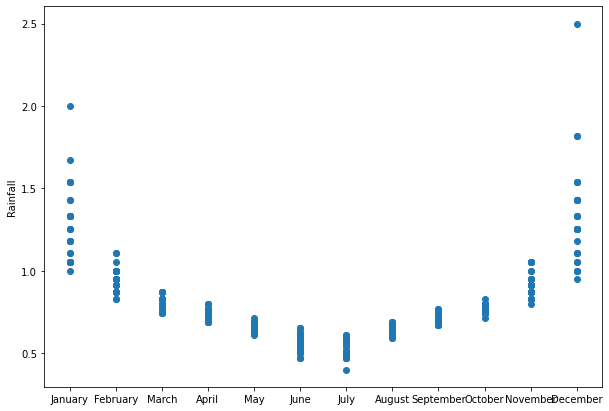

In [18]:
plt.figure(figsize=(10,7))
plt.ylabel("Rainfall")
plt.scatter(df.month, df.Rainfall)
plt.show()

In [19]:
# good to go

# Sales

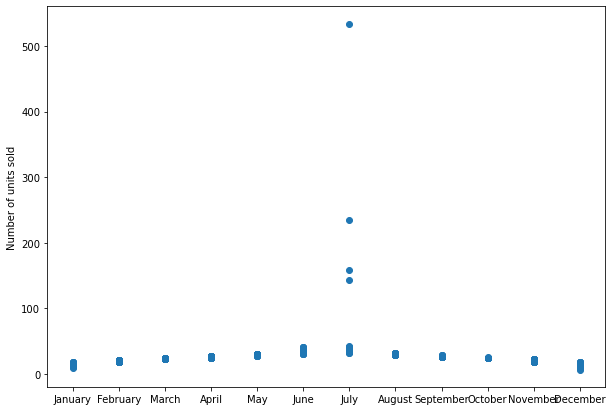

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(df.month, df.Sales)
plt.ylabel("Number of units sold")
plt.show()

In [21]:
df.Sales.sort_values()

Date
2017-12-31      7
2017-12-05     10
2017-01-01     10
2017-01-06     11
2017-12-10     11
             ... 
2017-07-27     43
2017-07-01    143
2017-07-02    158
2017-07-03    235
2017-07-04    534
Name: Sales, Length: 365, dtype: int64

In [22]:
# July 4th is the highest. It's a holiday in the USA. It's likely accurate

In [23]:
def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    multiplyer: default 1.5
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

In [24]:
lb, ub = get_lower_and_upper_bounds(df.Temperature, 1.5)

In [25]:
lb, ub

(17.30000000000001, 103.69999999999999)

In [26]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


In [27]:
col_num= df[['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']]

In [28]:
col = col_num.columns

In [29]:
col

Index(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [30]:
for c in col:
    print(c)
    lb, ub = get_lower_and_upper_bounds(df[c], 1.5)
    print(lb)
    print(ub)
    print('-----------------------')

Temperature
17.30000000000001
103.69999999999999
-----------------------
Rainfall
0.26
1.3
-----------------------
Flyers
4.0
76.0
-----------------------
Price
0.5
0.5
-----------------------
Sales
5.0
45.0
-----------------------


Ask >= or just > arbitrary anyways, just decide

In [31]:
df[(df.Temperature > 103.7) | (df.Temperature < 17.3)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December


In [32]:
# 15 is not that far off from 17. I'm gonna keep it

In [33]:
df[(df.Rainfall > 1.3) | (df.Rainfall < 0.26)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-06,Friday,25.3,1.54,23,0.5,11,January
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January
2017-01-12,Thursday,38.2,1.33,16,0.5,14,January
2017-01-13,Friday,37.5,1.33,19,0.5,15,January
2017-01-16,Monday,30.6,1.67,24,0.5,12,January


In [34]:
# is not that far off from limit. I'm gonna keep it

In [35]:
df[(df.Flyers > 76) | (df.Flyers < 4)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June
2017-07-14,Friday,92.0,0.50,80,0.5,40,July


In [36]:
# is not that far off from limit. I'm gonna keep it

In [37]:
df[(df.Sales > 45) | (df.Sales < 5)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


In [38]:
# is very far off from limit but agian, during the holiday weekend. Keeping sales

# Same thing but with muliplyer =3

In [39]:
col_num= df[['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']]

In [40]:
col = col_num.columns

In [41]:
col

Index(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [42]:
for c in col:
    print(c)
    lb, ub = get_lower_and_upper_bounds(df[c], 3)
    print(lb)
    print(ub)
    print('-----------------------')

Temperature
-15.09999999999998
136.09999999999997
-----------------------
Rainfall
-0.13
1.69
-----------------------
Flyers
-23.0
103.0
-----------------------
Price
0.5
0.5
-----------------------
Sales
-10.0
60.0
-----------------------


## I don't want to hard code, I want to loop. The previous one I just put in the values into a boolean mask. 
## I want to loop it so I don't have to do that

# Grader: 
Skip ahead ot cell 65. This is me learning differences between list, dictionaries, and dataframes

In [43]:
l = []
for c in col:
    print(c)
    lb, ub = get_lower_and_upper_bounds(df[c], 3)
    print(lb)
    print(ub)
    #l[c]= c
    l.append(lb)
    l.append(ub)

Temperature
-15.09999999999998
136.09999999999997
Rainfall
-0.13
1.69
Flyers
-23.0
103.0
Price
0.5
0.5
Sales
-10.0
60.0


In [44]:
l

[-15.09999999999998,
 136.09999999999997,
 -0.13,
 1.69,
 -23.0,
 103.0,
 0.5,
 0.5,
 -10.0,
 60.0]

In [45]:
l = []
for c in col:
    print(c)
    lb, ub = get_lower_and_upper_bounds(df[c], 3)
    print(lb)
    print(ub)
    d = {c:[lb,ub]}
    l.append(d)

Temperature
-15.09999999999998
136.09999999999997
Rainfall
-0.13
1.69
Flyers
-23.0
103.0
Price
0.5
0.5
Sales
-10.0
60.0


In [46]:
l

[{'Temperature': [-15.09999999999998, 136.09999999999997]},
 {'Rainfall': [-0.13, 1.69]},
 {'Flyers': [-23.0, 103.0]},
 {'Price': [0.5, 0.5]},
 {'Sales': [-10.0, 60.0]}]

In [47]:
q = pd.DataFrame(l)
q

,Temperature,Rainfall,Flyers,Price,Sales
0,"[-15.09999999999998, 136.09999999999997]",NaN,NaN,NaN,NaN
1,NaN,"[-0.13, 1.69]",NaN,NaN,NaN
2,NaN,NaN,"[-23.0, 103.0]",NaN,NaN
3,NaN,NaN,NaN,"[0.5, 0.5]",NaN
4,NaN,NaN,NaN,NaN,"[-10.0, 60.0]"


In [48]:
l

[{'Temperature': [-15.09999999999998, 136.09999999999997]},
 {'Rainfall': [-0.13, 1.69]},
 {'Flyers': [-23.0, 103.0]},
 {'Price': [0.5, 0.5]},
 {'Sales': [-10.0, 60.0]}]

In [49]:
# you have 5 dictionarys with key value pairs
# you want 1 dictionary with 5 key value pairs

In [50]:
# **l

In [51]:
r = pd.DataFrame.from_dict(l)
r

,Temperature,Rainfall,Flyers,Price,Sales
0,"[-15.09999999999998, 136.09999999999997]",NaN,NaN,NaN,NaN
1,NaN,"[-0.13, 1.69]",NaN,NaN,NaN
2,NaN,NaN,"[-23.0, 103.0]",NaN,NaN
3,NaN,NaN,NaN,"[0.5, 0.5]",NaN
4,NaN,NaN,NaN,NaN,"[-10.0, 60.0]"


# Concat
upper and lower

In [52]:
upper = []
lower = []
for c in col:
    print(c)
    lb, ub = get_lower_and_upper_bounds(df[c], 3)
    print(lb)
    print(ub)
    lower.append(lb)
    upper.append(ub)

Temperature
-15.09999999999998
136.09999999999997
Rainfall
-0.13
1.69
Flyers
-23.0
103.0
Price
0.5
0.5
Sales
-10.0
60.0


In [53]:
lower

[-15.09999999999998, -0.13, -23.0, 0.5, -10.0]

In [54]:
upper

[136.09999999999997, 1.69, 103.0, 0.5, 60.0]

In [55]:
bounds_3 = pd.DataFrame(lower, index = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], columns = ['Lower'])
bounds_3

,Lower
Temperature,-15.10
Rainfall,-0.13
Flyers,-23.00
Price,0.50
Sales,-10.00


In [56]:
g = pd.DataFrame(upper, index = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], columns = ['Upper'])
g

,Upper
Temperature,136.10
Rainfall,1.69
Flyers,103.00
Price,0.50
Sales,60.00


In [57]:
bounds_3 = pd.concat([bounds_3, g], axis = 1).T
bounds_3

,Temperature,Rainfall,Flyers,Price,Sales
Lower,-15.1,-0.13,-23.0,0.5,-10.0
Upper,136.1,1.69,103.0,0.5,60.0


# Answer

In [58]:
l = {}
for c in col:
    print(c)
    lb, ub = get_lower_and_upper_bounds(df[c], 3)
    print(lb)
    print(ub)
    l[c] = [lb, ub]

Temperature
-15.09999999999998
136.09999999999997
Rainfall
-0.13
1.69
Flyers
-23.0
103.0
Price
0.5
0.5
Sales
-10.0
60.0


In [59]:
#l[c] = [lb, ub]

In [60]:
l

{'Temperature': [-15.09999999999998, 136.09999999999997],
 'Rainfall': [-0.13, 1.69],
 'Flyers': [-23.0, 103.0],
 'Price': [0.5, 0.5],
 'Sales': [-10.0, 60.0]}

In [61]:
l['Temperature']

[-15.09999999999998, 136.09999999999997]

In [62]:
l['Temperature'][0]

-15.09999999999998

In [63]:
l['Temperature'][1]

136.09999999999997

In [64]:
m=pd.DataFrame(l)
m

,Temperature,Rainfall,Flyers,Price,Sales
0,-15.1,-0.13,-23.0,0.5,-10.0
1,136.1,1.69,103.0,0.5,60.0


# Grader:
Return to assignment. I now understand the loop code from class well enough to modify it for my work

In [65]:
# at a multiplier of 3:
# Create empty dictionary (the really big {} on the outside)
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number): # only go through numeric columns
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], 3) # as defined in previous function
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {} # add column to empty dict. column name = Temperature, Rain, etc      
        # Typical format for writing a dictionary. Yes, a dictionary can be a key/subset inside a dictionary
        #Dict = {1: 'Geeks', 2: 'For', 3: 'Geeks'}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        # inside outliers[column] create key 'bounds' which is also a dictionary with upper and lower bounds, labels and values
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
        # inside outliers [column] (same column as above as 'col' will be the same for the duration of one loop)
        #create key 'df' where df[boolean mask for > upper bound OR < lower bound]        
    else:
        pass

 Lower bound for Temperature : -15.09999999999998
 Upper bound for Temperature: 136.09999999999997

-----------------
 Lower bound for Rainfall : -0.13
 Upper bound for Rainfall: 1.69

-----------------
 Lower bound for Flyers : -23.0
 Upper bound for Flyers: 103.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : -10.0
 Upper bound for Sales: 60.0

-----------------


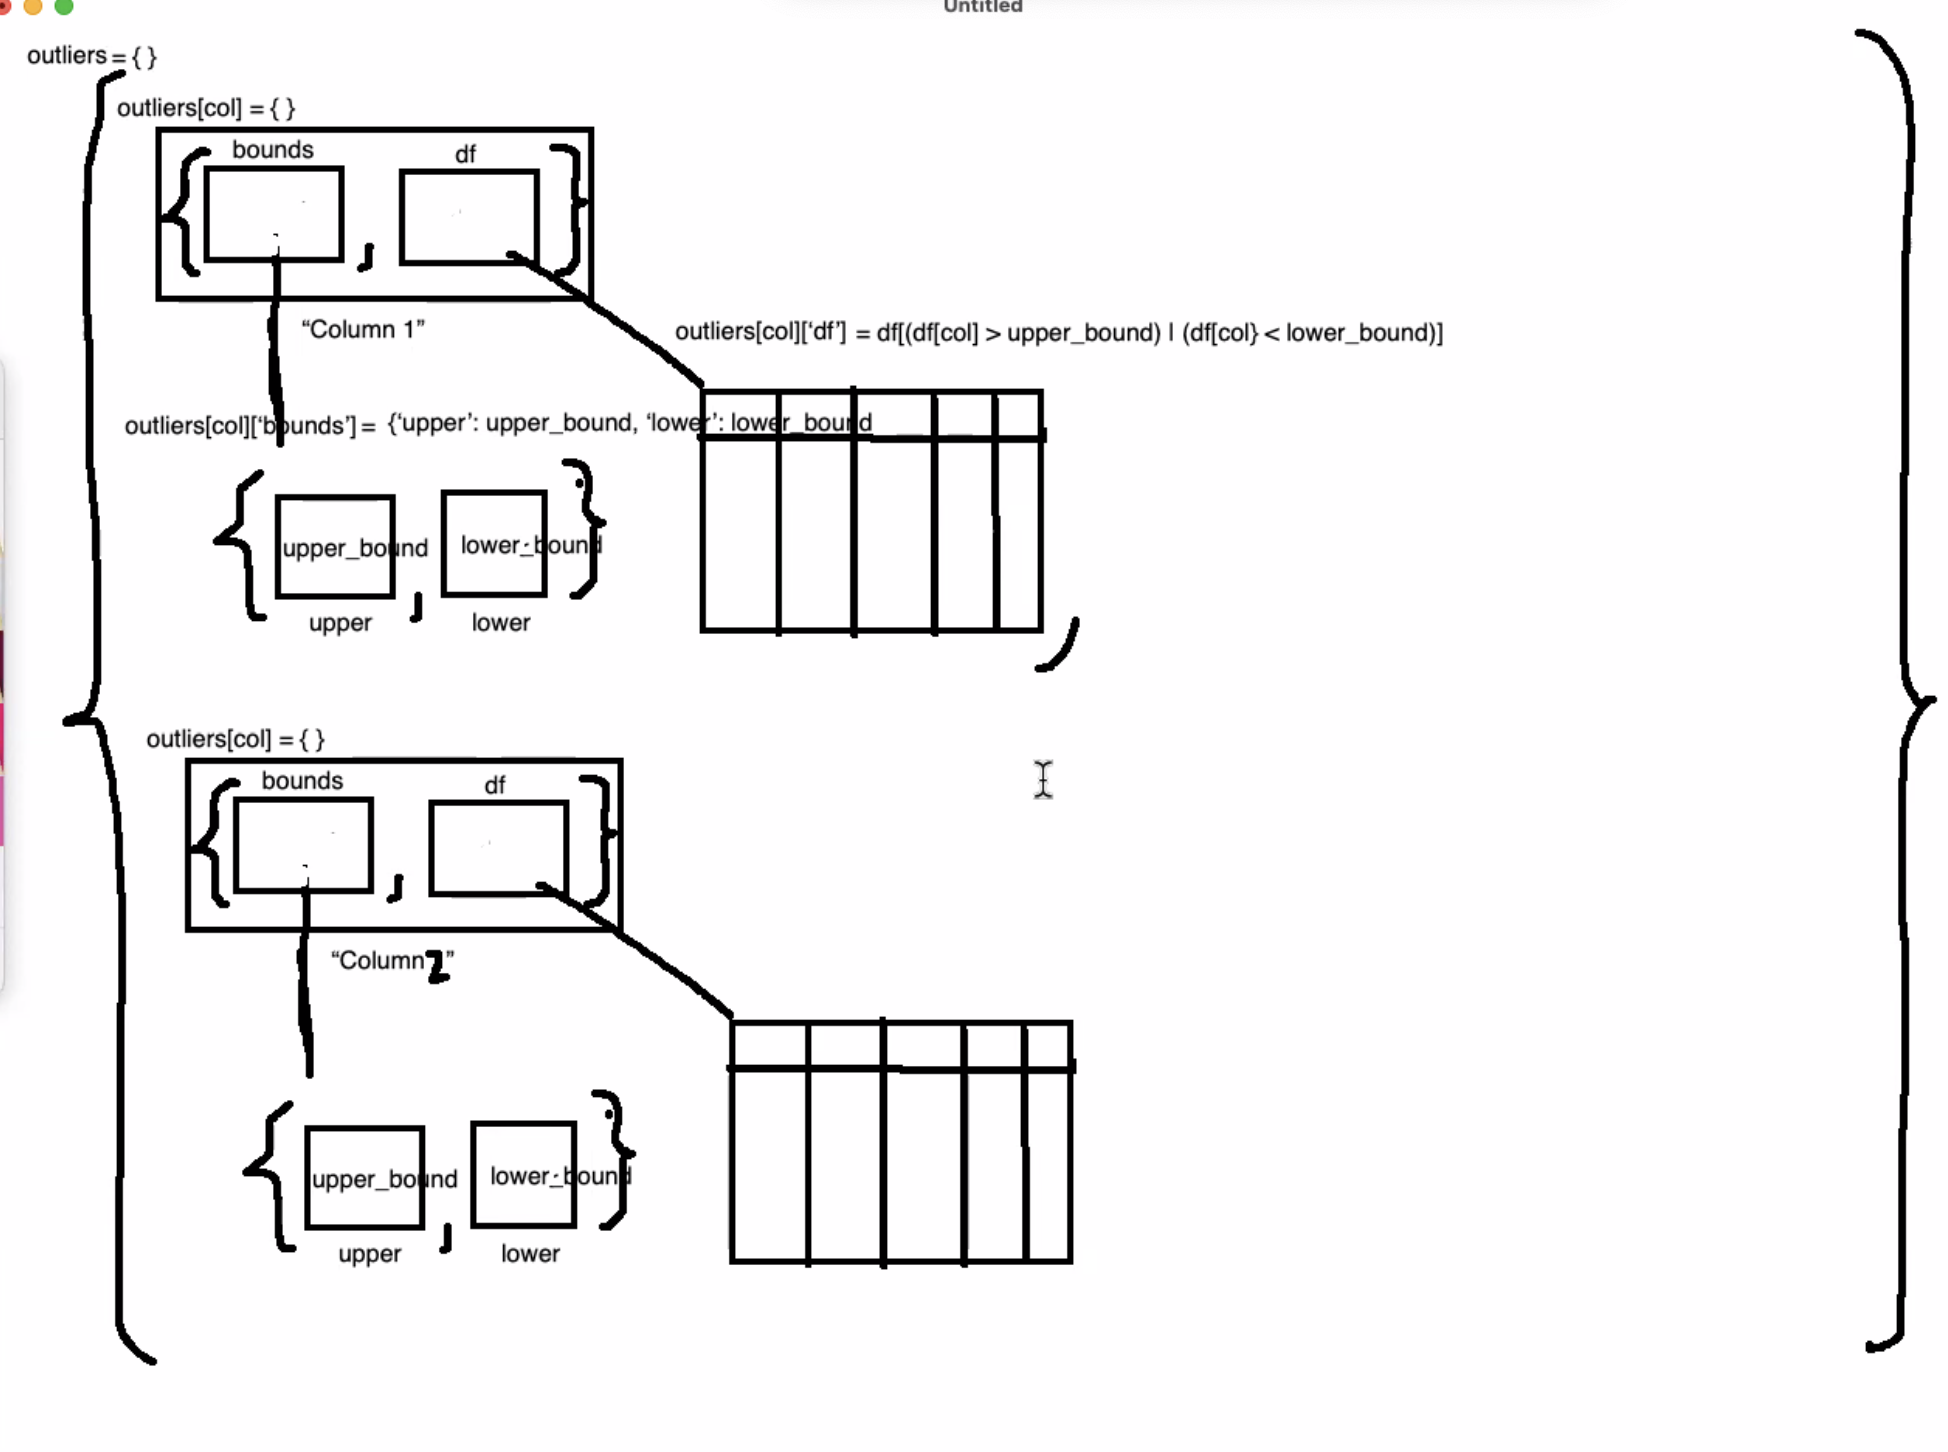

In [66]:
outliers.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [67]:
# to call a vlaue multiple keys inside a dict just stack them

In [68]:
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,


# temperature
No outliers, no problem

In [69]:
outliers['Rainfall']
# notice it's a list,  
#first is bounds in the format of a dictionary, then is df in the format of a dataframe
#{bounds:{bounds dictionayr}, [df]}

{'bounds': {'upper': 1.69, 'lower': -0.13},
 'df':                 Day  Temperature  Rainfall  Flyers  Price  Sales     month
 Date                                                                      
 2017-01-01   Sunday         27.0      2.00      15    0.5     10   January
 2017-12-05  Tuesday         22.0      1.82      11    0.5     10  December
 2017-12-10   Sunday         31.3      1.82      15    0.5     11  December
 2017-12-31   Sunday         15.1      2.50       9    0.5      7  December}

In [70]:
outliers['Rainfall']['bounds']

{'upper': 1.69, 'lower': -0.13}

In [71]:
outliers['Rainfall']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


# Rain
I'm going to keep them. The larges outlier is 2.50 which corresponds with the largest Temp outlier of 15.1.
Since it gets colder when it rains it makes sense that thsi was jsut a particularly cold and rainy day
but it is probably a legitimate value

In [72]:
outliers['Flyers']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,


In [73]:
outliers['Flyers']['bounds']

{'upper': 103.0, 'lower': -23.0}

# Flyers
no outliers

In [74]:
outliers['Sales']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


In [75]:
outliers['Sales']['bounds']

{'upper': 60.0, 'lower': -10.0}

# Sales
They are really far off, but based on the fact that July 4th is a holiday, it makes sense. I'm gonna keep em. 

# 2

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

    Use a 2 sigma decision rule to isolate the outliers.
        Do these make sense?
        Should certain outliers be kept or removed?



In [90]:
col = []
for c in df.columns:
    if df[c].dtype != 'O':
        col.append(c)
    

In [91]:
col

['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

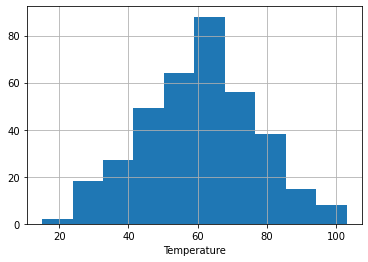

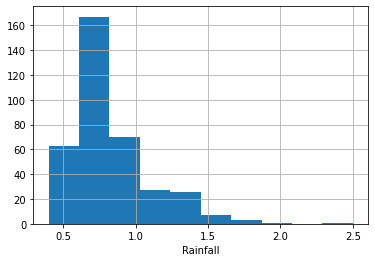

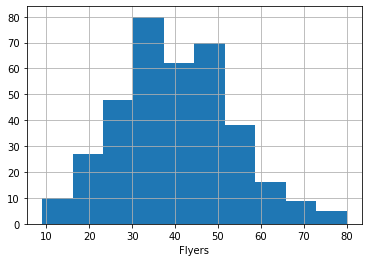

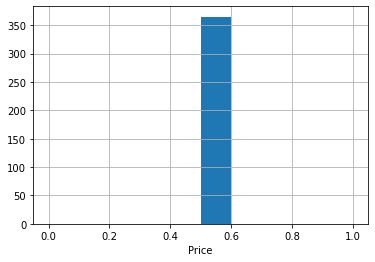

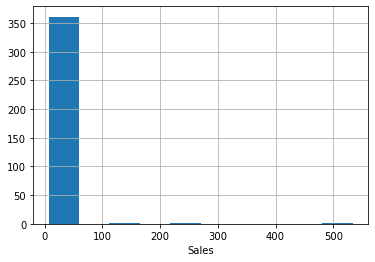

In [96]:
for c in col:
    plt.figure()
    df[c].hist()
    plt.xlabel(c)

In [100]:
col

['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [ ]:
# alpha = .05

In [104]:
for c in col:
    print(c)
    print(stats.shapiro(df[c]))
    print('-------------------')

Temperature
ShapiroResult(statistic=0.9941918849945068, pvalue=0.17928525805473328)
-------------------
Rainfall
ShapiroResult(statistic=0.8509272933006287, pvalue=3.75182614715421e-18)
-------------------
Flyers
ShapiroResult(statistic=0.9899383187294006, pvalue=0.01321041863411665)
-------------------
Price
ShapiroResult(statistic=1.0, pvalue=1.0)
-------------------
Sales
ShapiroResult(statistic=0.20651870965957642, pvalue=1.5745407468407645e-36)
-------------------


In [ ]:
# Temperature is Gaussian

In [ ]:
# the rest are not

In [105]:
df.shape

(365, 7)

# Josh's function
# Grader skip

In [ ]:
def shapiro_gausian_test(s, alpha=0.05):
    from scipy.stats import shapiro

    stat, p = stat, p = shapiro(s)
    result={'reject': p < alpha,
        'h0' : f"The distribution is gaussian",
        'stat_name': 'statistic',
        'stat': stat,
        'p_value': p,
        'alpha': alpha
    }
    return result

  #Dict = {1: 'Geeks', 2: 'For', 3: 'Geeks'}
# Dict = {key: value, key:value, key:value}

# 2
Temp is the only normally distributed one

In [108]:
T_std = df.Temperature.std()

In [109]:
T_mean = df.Temperature.mean()

In [111]:
upper_bound = T_mean + (2*T_std)
lower_bound = T_mean - (2*T_std)

In [112]:
df[(df.Temperature > upper_bound) | (df.Temperature < lower_bound)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-06,Friday,25.3,1.54,23,0.5,11,January
2017-06-16,Friday,99.3,0.47,77,0.5,41,June
2017-06-21,Wednesday,94.3,0.47,76,0.5,41,June
2017-06-26,Monday,102.6,0.47,60,0.5,42,June
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-10,Monday,98.0,0.49,66,0.5,40,July
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July


In [ ]:
# i've already decided I'm gonna keep all temps. Still gonna

# 3         

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv


In [113]:
T_std = df.Temperature.std()

In [114]:
T_mean = df.Temperature.mean()

In [115]:
upper_bound = T_mean + (3*T_std)
lower_bound = T_mean - (3*T_std)

In [116]:
df[(df.Temperature > upper_bound) | (df.Temperature < lower_bound)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,


# There are no outliers. which makes sense. 3 sigma includes 99.7% of the data


    68% of observations are within 1 standard deviation of the mean
    95% of observations are within 2 standard deviations of the mean
    99.7% of observations are within 3 standard deviations of the mean